# LIBRARIES


In [1]:
import matplotlib.pyplot as plt
import pylab
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, roc_auc_score,mean_squared_error,f1_score 


import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sb
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold
from numpy import loadtxt
from xgboost import XGBClassifier
import sys
sys.path.append("../")
import os

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
baseline_gbm= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/BaseLines/GBM/gbm_Results.xlsx")
baseline_lr= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/BaseLines/LogReg/LR_Results.xlsx")

#dir level 1
dir_gbm=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_1/GBM/gbm_Results.xlsx")
dir_lr= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_1/LogReg/LR_Results.xlsx")

#reweighing
rw_gbm=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Reweighing/GBM/gbm_Results.xlsx")
rw_lr= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Reweighing/LogReg/LR_Results.xlsx")

#lfr
lfr_gbm=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/LFR/NewLFR_Results/gbm_Results.xlsx")
lfr_lr= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/LFR/NewLFR_Results/LR_Results.xlsx")

#Adversarial Debiasing
AdDeb= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/AdDeb/AdDeb.xlsx")

#PRemover
PRemover=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/PRemover/PRemover100.xlsx")

#Equal Odds
EO_gbm=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/EqualOdds/EO_gbm.xlsx")
EO_lr=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/EqualOdds/EO_LogReg.xlsx")

#CalEqual Odds
CalEO_gbm=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/CalEqualOdds/CalEO_gbm.xlsx")
CalEO_lr=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/CalEqualOdds/CalEO_LogReg.xlsx")


#varying levels of dir repair
#level 0
dir_gbm_0=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p0/GBM/gbm_Results.xlsx")
dir_lr_0= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p0/LogReg/LR_Results.xlsx")

#level 0.3
dir_gbm_3=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p3/GBM/gbm_Results.xlsx")
dir_lr_3= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p3/LogReg/LR_Results.xlsx")
#level 0.5
dir_gbm_5=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p5/GBM/gbm_Results.xlsx")
dir_lr_5= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p5/LogReg/LR_Results.xlsx")

#level 0.7
dir_gbm_7=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p7/GBM/gbm_Results.xlsx")
dir_lr_7= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p7/LogReg/LR_Results.xlsx")


#PRemover at other values
PRemover75=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/PRemover/PRemover75.xlsx")
PRemover50=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/PRemover/PRemover50.xlsx")
PRemover25=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/PRemover/PRemover25.xlsx")
PRemover1=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/PRemover/PRemover1.xlsx")

#Meta Classifier at various values
Meta0 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta0.xlsx")
Meta2 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta2.xlsx")
Meta4 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta4.xlsx")
Meta6 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta6.xlsx")
Meta8 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta8.xlsx")
Meta1 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta10.xlsx")

# METRICS

We put together various metrics for fairness utility trade-off

In [4]:
#baselines
Violent_gbm_baseline=pd.read_excel(baseline_gbm, sheet_name="Violent")[51:52].reset_index()
Violent_gbm_baseline_std= pd.read_excel(baseline_gbm, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_gbm_baseline= pd.concat([Violent_gbm_baseline,Violent_gbm_baseline_std], axis=1).drop('index',axis=1) #reset index adds and index column

#logistic regression
Violent_lr_baseline= pd.read_excel(baseline_lr, sheet_name="Violent")[51:52].reset_index()
Violent_lr_baseline_std= pd.read_excel(baseline_lr, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_lr_baseline= pd.concat([Violent_lr_baseline,Violent_lr_baseline_std], axis=1).drop('index',axis=1)




In [5]:
# #disparate impact remover
Violent_gbm_dir=pd.read_excel(dir_gbm, sheet_name="Violent")[51:52].reset_index()
Violent_gbm_dir_std= pd.read_excel(dir_gbm, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_gbm_dir= pd.concat([Violent_gbm_dir,Violent_gbm_dir_std], axis=1).drop('index',axis=1)

#logistic regression
Violent_lr_dir= pd.read_excel(dir_lr, sheet_name="Violent")[51:52].reset_index()
Violent_lr_dir_std= pd.read_excel(dir_lr, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_lr_dir= pd.concat([Violent_lr_dir,Violent_lr_dir_std], axis=1).drop('index',axis=1)


In [6]:
# #reweighing
Violent_gbm_rw=pd.read_excel(rw_gbm, sheet_name="Violent")[51:52].reset_index()
Violent_gbm_rw_std= pd.read_excel(rw_gbm, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_gbm_rw= pd.concat([Violent_gbm_rw,Violent_gbm_rw_std], axis=1).drop('index',axis=1)

#logistic regression
Violent_lr_rw= pd.read_excel(rw_lr, sheet_name="Violent")[51:52].reset_index()
Violent_lr_rw_std= pd.read_excel(rw_lr, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_lr_rw= pd.concat([Violent_lr_rw,Violent_lr_rw_std], axis=1).drop('index',axis=1)

In [7]:
# lfr
Violent_gbm_lfr=pd.read_excel(lfr_gbm, sheet_name="Violent")[51:52].reset_index()
Violent_gbm_lfr_std= pd.read_excel(lfr_gbm, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_gbm_lfr= pd.concat([Violent_gbm_lfr,Violent_gbm_lfr_std], axis=1).drop('index',axis=1)

#logistic regression
Violent_lr_lfr= pd.read_excel(lfr_lr, sheet_name="Violent")[51:52].reset_index()
Violent_lr_lfr_std= pd.read_excel(lfr_lr, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_lr_lfr= pd.concat([Violent_lr_lfr,Violent_lr_lfr_std], axis=1).drop('index',axis=1)

In [8]:
#Prejudice Remover
Violent_pr_remover= pd.read_excel(PRemover, sheet_name="Violent")[51:52].reset_index()
Violent_pr_remover_std= pd.read_excel(PRemover, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_pr_remover= pd.concat([Violent_pr_remover,Violent_pr_remover_std], axis=1).drop('index',axis=1)

In [9]:
#Adversarial Debiasing
Violent_AdDeb= pd.read_excel(AdDeb, sheet_name="Violent")[51:52].reset_index()
Violent_AdDeb_std= pd.read_excel(AdDeb, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_AdDeb= pd.concat([Violent_AdDeb,Violent_AdDeb_std], axis=1).drop('index',axis=1)

In [10]:
#Meta Classifier
Violent_Meta= pd.read_excel(Meta1, sheet_name="Violent")[51:52].reset_index()
Violent_Meta_std= pd.read_excel(Meta1, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_Meta= pd.concat([Violent_Meta,Violent_Meta_std], axis=1).drop('index',axis=1)

In [11]:
# EqOdds
Violent_gbm_EO=pd.read_excel(EO_gbm, sheet_name="Violent")[51:52].reset_index()
Violent_gbm_EO_std= pd.read_excel(EO_gbm, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_gbm_EO= pd.concat([Violent_gbm_EO,Violent_gbm_EO_std], axis=1).drop('index',axis=1)

#logistic regression
Violent_lr_EO= pd.read_excel(EO_lr, sheet_name="Violent")[51:52].reset_index()
Violent_lr_EO_std= pd.read_excel(EO_lr, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_lr_EO= pd.concat([Violent_lr_EO,Violent_lr_EO_std], axis=1).drop('index',axis=1)

In [12]:
# CalEqOdds
Violent_gbm_CalEO=pd.read_excel(CalEO_gbm, sheet_name="Violent")[51:52].reset_index()
Violent_gbm_CalEO_std= pd.read_excel(CalEO_gbm, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_gbm_CalEO= pd.concat([Violent_gbm_CalEO,Violent_gbm_CalEO_std], axis=1).drop('index',axis=1)

#logistic regression
Violent_lr_CalEO= pd.read_excel(CalEO_lr, sheet_name="Violent")[51:52].reset_index()
Violent_lr_CalEO_std= pd.read_excel(CalEO_lr, sheet_name="Violent")[52:53].add_suffix('_std').reset_index()
#avg and std together
Violent_lr_CalEO= pd.concat([Violent_lr_CalEO,Violent_lr_CalEO_std], axis=1).drop('index',axis=1)

In [13]:
#ideal dataframes
ideal = pd.DataFrame(index=[0], data={'x':0, 'y':1})
idealfairness = pd.DataFrame(index=[0], data={'x':0, 'y':0})


# Plotting Fairness Accuracy Tradeoffs

 # Performance Vs Group Fairness

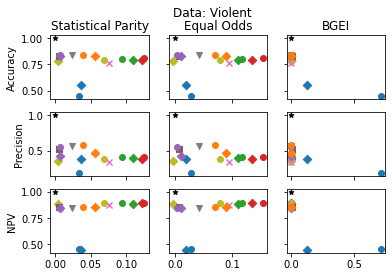

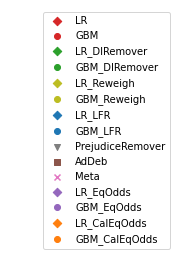

In [14]:
fig,axs = plt.subplots(nrows= 3, ncols= 3)
plt.rcParams.update({'figure.max_open_warning': 0})
axs[0,0].scatter(Violent_lr_baseline['SP'],Violent_lr_baseline['ACCURACY'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_baseline['SP'],Violent_gbm_baseline['ACCURACY'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_dir['SP'],Violent_lr_dir['ACCURACY'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_dir['SP'],Violent_gbm_dir['ACCURACY'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_rw['SP'],Violent_lr_rw['ACCURACY'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_rw['SP'],Violent_gbm_rw['ACCURACY'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_lfr['SP'],Violent_lr_lfr['ACCURACY'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_lfr['SP'],Violent_gbm_lfr['ACCURACY'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_pr_remover['SP'],Violent_pr_remover['ACCURACY'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,0].scatter(Violent_AdDeb['SP'],Violent_AdDeb['ACCURACY'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,0].scatter(Violent_Meta['SP'],Violent_Meta['ACCURACY'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,0].scatter(Violent_lr_EO['SP'],Violent_lr_EO['ACCURACY'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_EO['SP'],Violent_gbm_EO['ACCURACY'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_CalEO['SP'],Violent_lr_CalEO['ACCURACY'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_CalEO['SP'],Violent_gbm_CalEO['ACCURACY'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,0].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

axs[0,1].scatter(Violent_lr_baseline['EO'],Violent_lr_baseline['ACCURACY'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_baseline['EO'],Violent_gbm_baseline['ACCURACY'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_dir['EO'],Violent_lr_dir['ACCURACY'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_dir['EO'],Violent_gbm_dir['ACCURACY'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_rw['EO'],Violent_lr_rw['ACCURACY'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_rw['EO'],Violent_gbm_rw['ACCURACY'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_lfr['EO'],Violent_lr_lfr['ACCURACY'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_lfr['EO'],Violent_gbm_lfr['ACCURACY'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_pr_remover['EO'],Violent_pr_remover['ACCURACY'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,1].scatter(Violent_AdDeb['EO'],Violent_AdDeb['ACCURACY'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,1].scatter(Violent_Meta['EO'],Violent_Meta['ACCURACY'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,1].scatter(Violent_lr_EO['EO'],Violent_lr_EO['ACCURACY'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_EO['EO'],Violent_gbm_EO['ACCURACY'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_CalEO['EO'],Violent_lr_CalEO['ACCURACY'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_CalEO['EO'],Violent_gbm_CalEO['ACCURACY'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,1].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

axs[0,2].scatter(Violent_lr_baseline['BGEI'],Violent_lr_baseline['ACCURACY'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_baseline['BGEI'],Violent_gbm_baseline['ACCURACY'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_dir['BGEI'],Violent_lr_dir['ACCURACY'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_dir['BGEI'],Violent_gbm_dir['ACCURACY'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_rw['BGEI'],Violent_lr_rw['ACCURACY'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_rw['BGEI'],Violent_gbm_rw['ACCURACY'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_lfr['BGEI'],Violent_lr_lfr['ACCURACY'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_lfr['BGEI'],Violent_gbm_lfr['ACCURACY'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_pr_remover['BGEI'],Violent_pr_remover['ACCURACY'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,2].scatter(Violent_AdDeb['BGEI'],Violent_AdDeb['ACCURACY'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,2].scatter(Violent_Meta['BGEI'],Violent_Meta['ACCURACY'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,2].scatter(Violent_lr_EO['BGEI'],Violent_lr_EO['ACCURACY'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_EO['BGEI'],Violent_gbm_EO['ACCURACY'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_CalEO['BGEI'],Violent_lr_CalEO['ACCURACY'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_CalEO['BGEI'],Violent_gbm_CalEO['ACCURACY'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,2].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

#**********************************************************************************************************************************************
axs[1,0].scatter(Violent_lr_baseline['SP'],Violent_lr_baseline['PPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_baseline['SP'],Violent_gbm_baseline['PPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_dir['SP'],Violent_lr_dir['PPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_dir['SP'],Violent_gbm_dir['PPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_rw['SP'],Violent_lr_rw['PPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_rw['SP'],Violent_gbm_rw['PPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_lfr['SP'],Violent_lr_lfr['PPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_lfr['SP'],Violent_gbm_lfr['PPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_pr_remover['SP'],Violent_pr_remover['PPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,0].scatter(Violent_AdDeb['SP'],Violent_AdDeb['PPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,0].scatter(Violent_Meta['SP'],Violent_Meta['PPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,0].scatter(Violent_lr_EO['SP'],Violent_lr_EO['PPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_EO['SP'],Violent_gbm_EO['PPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_CalEO['SP'],Violent_lr_CalEO['PPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_CalEO['SP'],Violent_gbm_CalEO['PPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,0].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

axs[1,1].scatter(Violent_lr_baseline['EO'],Violent_lr_baseline['PPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_baseline['EO'],Violent_gbm_baseline['PPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_dir['EO'],Violent_lr_dir['PPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_dir['EO'],Violent_gbm_dir['PPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_rw['EO'],Violent_lr_rw['PPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_rw['EO'],Violent_gbm_rw['PPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_lfr['EO'],Violent_lr_lfr['PPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_lfr['EO'],Violent_gbm_lfr['PPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_pr_remover['EO'],Violent_pr_remover['PPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,1].scatter(Violent_AdDeb['EO'],Violent_AdDeb['PPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,1].scatter(Violent_Meta['EO'],Violent_Meta['PPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,1].scatter(Violent_lr_EO['EO'],Violent_lr_EO['PPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_EO['EO'],Violent_gbm_EO['PPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_CalEO['EO'],Violent_lr_CalEO['PPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_CalEO['EO'],Violent_gbm_CalEO['PPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,1].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

axs[1,2].scatter(Violent_lr_baseline['BGEI'],Violent_lr_baseline['PPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_baseline['BGEI'],Violent_gbm_baseline['PPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_dir['BGEI'],Violent_lr_dir['PPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_dir['BGEI'],Violent_gbm_dir['PPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_rw['BGEI'],Violent_lr_rw['PPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_rw['BGEI'],Violent_gbm_rw['PPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_lfr['BGEI'],Violent_lr_lfr['PPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_lfr['BGEI'],Violent_gbm_lfr['PPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_pr_remover['BGEI'],Violent_pr_remover['PPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,2].scatter(Violent_AdDeb['BGEI'],Violent_AdDeb['PPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,2].scatter(Violent_Meta['BGEI'],Violent_Meta['PPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,2].scatter(Violent_lr_EO['BGEI'],Violent_lr_EO['PPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_EO['BGEI'],Violent_gbm_EO['PPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_CalEO['BGEI'],Violent_lr_CalEO['PPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_CalEO['BGEI'],Violent_gbm_CalEO['PPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,2].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

#***********************************************************************************************************************************************
axs[2,0].scatter(Violent_lr_baseline['SP'],Violent_lr_baseline['NPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_baseline['SP'],Violent_gbm_baseline['NPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_dir['SP'],Violent_lr_dir['NPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_dir['SP'],Violent_gbm_dir['NPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_rw['SP'],Violent_lr_rw['NPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_rw['SP'],Violent_gbm_rw['NPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_lfr['SP'],Violent_lr_lfr['NPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_lfr['SP'],Violent_gbm_lfr['NPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_pr_remover['SP'],Violent_pr_remover['NPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,0].scatter(Violent_AdDeb['SP'],Violent_AdDeb['NPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,0].scatter(Violent_Meta['SP'],Violent_Meta['NPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,0].scatter(Violent_lr_EO['SP'],Violent_lr_EO['NPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_EO['SP'],Violent_gbm_EO['NPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_CalEO['SP'],Violent_lr_CalEO['NPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_CalEO['SP'],Violent_gbm_CalEO['NPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,0].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

axs[2,1].scatter(Violent_lr_baseline['EO'],Violent_lr_baseline['NPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_baseline['EO'],Violent_gbm_baseline['NPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_dir['EO'],Violent_lr_dir['NPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_dir['EO'],Violent_gbm_dir['NPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_rw['EO'],Violent_lr_rw['NPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_rw['EO'],Violent_gbm_rw['NPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_lfr['EO'],Violent_lr_lfr['NPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_lfr['EO'],Violent_gbm_lfr['NPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_pr_remover['EO'],Violent_pr_remover['NPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,1].scatter(Violent_AdDeb['EO'],Violent_AdDeb['NPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,1].scatter(Violent_Meta['EO'],Violent_Meta['NPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,1].scatter(Violent_lr_EO['EO'],Violent_lr_EO['NPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_EO['EO'],Violent_gbm_EO['NPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_CalEO['EO'],Violent_lr_CalEO['NPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_CalEO['EO'],Violent_gbm_CalEO['NPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,1].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

axs[2,2].scatter(Violent_lr_baseline['BGEI'],Violent_lr_baseline['NPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_baseline['BGEI'],Violent_gbm_baseline['NPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_dir['BGEI'],Violent_lr_dir['NPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_dir['BGEI'],Violent_gbm_dir['NPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_rw['BGEI'],Violent_lr_rw['NPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_rw['BGEI'],Violent_gbm_rw['NPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_lfr['BGEI'],Violent_lr_lfr['NPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_lfr['BGEI'],Violent_gbm_lfr['NPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_pr_remover['BGEI'],Violent_pr_remover['NPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,2].scatter(Violent_AdDeb['BGEI'],Violent_AdDeb['NPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,2].scatter(Violent_Meta['BGEI'],Violent_Meta['NPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,2].scatter(Violent_lr_EO['BGEI'],Violent_lr_EO['NPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_EO['BGEI'],Violent_gbm_EO['NPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_CalEO['BGEI'],Violent_lr_CalEO['NPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_CalEO['BGEI'],Violent_gbm_CalEO['NPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,2].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

for ax in axs.flat:
    ax.label_outer()
axs[0,0].set_ylabel('Accuracy')
axs[0,0].set_title('Statistical Parity')
axs[1,0].set_ylabel('Precision')
axs[0,1].set_title('Equal Odds')
axs[2,0].set_ylabel('NPV')
axs[0,2].set_title('BGEI')
fig.suptitle('Data: Violent')
#axs[0,0].legend(bbox_to_anchor=(4.8, 1.2),ncol=1)
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/Violent/PerFair2.png',dpi=300, format='png', bbox_inches='tight')

figsize = (3, 3)
fig_leg = plt.figure(figsize=figsize)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(*axs[0,0].get_legend_handles_labels())
# hide the axes frame and the x/y labels
ax_leg.axis('off')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/Violent/legend.png',dpi=300, format='png', bbox_inches='tight')

plt.show()





#Performance Vs Individual Fairness

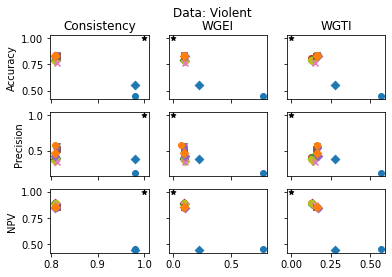

In [15]:
fig,axs = plt.subplots(nrows= 3, ncols= 3)
plt.rcParams.update({'figure.max_open_warning': 0})
axs[0,0].scatter(Violent_lr_baseline['CONSISTENCY'],Violent_lr_baseline['ACCURACY'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_baseline['CONSISTENCY'],Violent_gbm_baseline['ACCURACY'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_dir['CONSISTENCY'],Violent_lr_dir['ACCURACY'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_dir['CONSISTENCY'],Violent_gbm_dir['ACCURACY'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_rw['CONSISTENCY'],Violent_lr_rw['ACCURACY'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_rw['CONSISTENCY'],Violent_gbm_rw['ACCURACY'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_lfr['CONSISTENCY'],Violent_lr_lfr['ACCURACY'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_lfr['CONSISTENCY'],Violent_gbm_lfr['ACCURACY'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_pr_remover['CONSISTENCY'],Violent_pr_remover['ACCURACY'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,0].scatter(Violent_AdDeb['CONSISTENCY'],Violent_AdDeb['ACCURACY'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,0].scatter(Violent_Meta['CONSISTENCY'],Violent_Meta['ACCURACY'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,0].scatter(Violent_lr_EO['CONSISTENCY'],Violent_lr_EO['ACCURACY'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_EO['CONSISTENCY'],Violent_gbm_EO['ACCURACY'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_CalEO['CONSISTENCY'],Violent_lr_CalEO['ACCURACY'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_CalEO['CONSISTENCY'],Violent_gbm_CalEO['ACCURACY'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,0].scatter(1,1,color='black', marker= '*',  s=25)

axs[0,1].scatter(Violent_lr_baseline['WGEI'],Violent_lr_baseline['ACCURACY'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_baseline['WGEI'],Violent_gbm_baseline['ACCURACY'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_dir['WGEI'],Violent_lr_dir['ACCURACY'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_dir['WGEI'],Violent_gbm_dir['ACCURACY'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_rw['WGEI'],Violent_lr_rw['ACCURACY'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_rw['WGEI'],Violent_gbm_rw['ACCURACY'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_lfr['WGEI'],Violent_lr_lfr['ACCURACY'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_lfr['WGEI'],Violent_gbm_lfr['ACCURACY'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_pr_remover['WGEI'],Violent_pr_remover['ACCURACY'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,1].scatter(Violent_AdDeb['WGEI'],Violent_AdDeb['ACCURACY'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,1].scatter(Violent_Meta['WGEI'],Violent_Meta['ACCURACY'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,1].scatter(Violent_lr_EO['WGEI'],Violent_lr_EO['ACCURACY'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_EO['WGEI'],Violent_gbm_EO['ACCURACY'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_CalEO['WGEI'],Violent_lr_CalEO['ACCURACY'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_CalEO['WGEI'],Violent_gbm_CalEO['ACCURACY'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,1].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

axs[0,2].scatter(Violent_lr_baseline['WGTI'],Violent_lr_baseline['ACCURACY'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_baseline['WGTI'],Violent_gbm_baseline['ACCURACY'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_dir['WGTI'],Violent_lr_dir['ACCURACY'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_dir['WGTI'],Violent_gbm_dir['ACCURACY'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_rw['WGTI'],Violent_lr_rw['ACCURACY'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_rw['WGTI'],Violent_gbm_rw['ACCURACY'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_lfr['WGTI'],Violent_lr_lfr['ACCURACY'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_lfr['WGTI'],Violent_gbm_lfr['ACCURACY'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_pr_remover['WGTI'],Violent_pr_remover['ACCURACY'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,2].scatter(Violent_AdDeb['WGTI'],Violent_AdDeb['ACCURACY'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,2].scatter(Violent_Meta['WGTI'],Violent_Meta['ACCURACY'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,2].scatter(Violent_lr_EO['WGTI'],Violent_lr_EO['ACCURACY'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_EO['WGTI'],Violent_gbm_EO['ACCURACY'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_CalEO['WGTI'],Violent_lr_CalEO['ACCURACY'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_CalEO['WGTI'],Violent_gbm_CalEO['ACCURACY'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,2].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

#**********************************************************************************************************************************************
axs[1,0].scatter(Violent_lr_baseline['CONSISTENCY'],Violent_lr_baseline['PPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_baseline['CONSISTENCY'],Violent_gbm_baseline['PPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_dir['CONSISTENCY'],Violent_lr_dir['PPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_dir['CONSISTENCY'],Violent_gbm_dir['PPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_rw['CONSISTENCY'],Violent_lr_rw['PPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_rw['CONSISTENCY'],Violent_gbm_rw['PPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_lfr['CONSISTENCY'],Violent_lr_lfr['PPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_lfr['CONSISTENCY'],Violent_gbm_lfr['PPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_pr_remover['CONSISTENCY'],Violent_pr_remover['PPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,0].scatter(Violent_AdDeb['CONSISTENCY'],Violent_AdDeb['PPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,0].scatter(Violent_Meta['CONSISTENCY'],Violent_Meta['PPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,0].scatter(Violent_lr_EO['CONSISTENCY'],Violent_lr_EO['PPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_EO['CONSISTENCY'],Violent_gbm_EO['PPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_CalEO['CONSISTENCY'],Violent_lr_CalEO['PPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_CalEO['CONSISTENCY'],Violent_gbm_CalEO['PPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,0].scatter(1,1,color='black', marker= '*',  s=25)

axs[1,1].scatter(Violent_lr_baseline['WGEI'],Violent_lr_baseline['PPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_baseline['WGEI'],Violent_gbm_baseline['PPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_dir['WGEI'],Violent_lr_dir['PPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_dir['WGEI'],Violent_gbm_dir['PPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_rw['WGEI'],Violent_lr_rw['PPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_rw['WGEI'],Violent_gbm_rw['PPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_lfr['WGEI'],Violent_lr_lfr['PPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_lfr['WGEI'],Violent_gbm_lfr['PPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_pr_remover['WGEI'],Violent_pr_remover['PPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,1].scatter(Violent_AdDeb['WGEI'],Violent_AdDeb['PPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,1].scatter(Violent_Meta['WGEI'],Violent_Meta['PPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,1].scatter(Violent_lr_EO['WGEI'],Violent_lr_EO['PPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_EO['WGEI'],Violent_gbm_EO['PPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_CalEO['WGEI'],Violent_lr_CalEO['PPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_CalEO['EO'],Violent_gbm_CalEO['PPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,1].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

axs[1,2].scatter(Violent_lr_baseline['WGTI'],Violent_lr_baseline['PPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_baseline['WGTI'],Violent_gbm_baseline['PPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_dir['WGTI'],Violent_lr_dir['PPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_dir['WGTI'],Violent_gbm_dir['PPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_rw['WGTI'],Violent_lr_rw['PPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_rw['WGTI'],Violent_gbm_rw['PPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_lfr['WGTI'],Violent_lr_lfr['PPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_lfr['WGTI'],Violent_gbm_lfr['PPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_pr_remover['WGTI'],Violent_pr_remover['PPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,2].scatter(Violent_AdDeb['WGTI'],Violent_AdDeb['PPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,2].scatter(Violent_Meta['WGTI'],Violent_Meta['PPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,2].scatter(Violent_lr_EO['WGTI'],Violent_lr_EO['PPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_EO['WGTI'],Violent_gbm_EO['PPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_CalEO['WGTI'],Violent_lr_CalEO['PPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_CalEO['WGTI'],Violent_gbm_CalEO['PPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,2].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

#***********************************************************************************************************************************************
axs[2,0].scatter(Violent_lr_baseline['CONSISTENCY'],Violent_lr_baseline['NPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_baseline['CONSISTENCY'],Violent_gbm_baseline['NPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_dir['CONSISTENCY'],Violent_lr_dir['NPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_dir['CONSISTENCY'],Violent_gbm_dir['NPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_rw['CONSISTENCY'],Violent_lr_rw['NPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_rw['CONSISTENCY'],Violent_gbm_rw['NPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_lfr['CONSISTENCY'],Violent_lr_lfr['NPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_lfr['CONSISTENCY'],Violent_gbm_lfr['NPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_pr_remover['CONSISTENCY'],Violent_pr_remover['NPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,0].scatter(Violent_AdDeb['CONSISTENCY'],Violent_AdDeb['NPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,0].scatter(Violent_Meta['CONSISTENCY'],Violent_Meta['NPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,0].scatter(Violent_lr_EO['CONSISTENCY'],Violent_lr_EO['NPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_EO['CONSISTENCY'],Violent_gbm_EO['NPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_CalEO['CONSISTENCY'],Violent_lr_CalEO['NPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_CalEO['CONSISTENCY'],Violent_gbm_CalEO['NPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,0].scatter(1,1,color='black', marker= '*',  s=25)

axs[2,1].scatter(Violent_lr_baseline['WGEI'],Violent_lr_baseline['NPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_baseline['WGEI'],Violent_gbm_baseline['NPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_dir['WGEI'],Violent_lr_dir['NPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_dir['WGEI'],Violent_gbm_dir['NPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_rw['WGEI'],Violent_lr_rw['NPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_rw['WGEI'],Violent_gbm_rw['NPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_lfr['WGEI'],Violent_lr_lfr['NPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_lfr['WGEI'],Violent_gbm_lfr['NPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_pr_remover['WGEI'],Violent_pr_remover['NPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,1].scatter(Violent_AdDeb['WGEI'],Violent_AdDeb['NPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,1].scatter(Violent_Meta['WGEI'],Violent_Meta['NPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,1].scatter(Violent_lr_EO['WGEI'],Violent_lr_EO['NPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_EO['WGEI'],Violent_gbm_EO['NPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_CalEO['WGEI'],Violent_lr_CalEO['NPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_CalEO['WGEI'],Violent_gbm_CalEO['NPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,1].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)

axs[2,2].scatter(Violent_lr_baseline['WGTI'],Violent_lr_baseline['NPV'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_baseline['WGTI'],Violent_gbm_baseline['NPV'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_dir['WGTI'],Violent_lr_dir['NPV'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_dir['WGTI'],Violent_gbm_dir['NPV'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_rw['WGTI'],Violent_lr_rw['NPV'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_rw['WGTI'],Violent_gbm_rw['NPV'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_lfr['WGTI'],Violent_lr_lfr['NPV'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_lfr['WGTI'],Violent_gbm_lfr['NPV'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_pr_remover['WGTI'],Violent_pr_remover['NPV'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,2].scatter(Violent_AdDeb['WGTI'],Violent_AdDeb['NPV'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,2].scatter(Violent_Meta['WGTI'],Violent_Meta['NPV'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,2].scatter(Violent_lr_EO['WGTI'],Violent_lr_EO['NPV'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_EO['WGTI'],Violent_gbm_EO['NPV'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_CalEO['WGTI'],Violent_lr_CalEO['NPV'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_CalEO['WGTI'],Violent_gbm_CalEO['NPV'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,2].scatter(ideal['x'],ideal['y'],color='black', marker= '*',  s=25)
for ax in axs.flat:
    ax.label_outer()
axs[0,0].set_ylabel('Accuracy')
axs[0,0].set_title('Consistency')
axs[1,0].set_ylabel('Precision')
axs[0,1].set_title('WGEI')
axs[2,0].set_ylabel('NPV')
axs[0,2].set_title('WGTI')
fig.suptitle('Data: Violent')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/Violent/PerFair1.png',dpi=300, format='png', bbox_inches='tight')
plt.show()




# CONSISTENCY BETWEEN GROUPAND INDIVIDUAL FAIRNESS

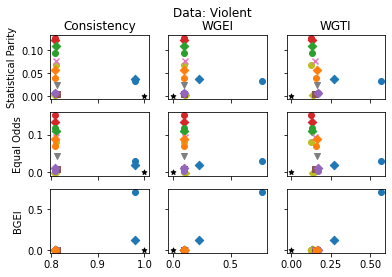

In [16]:
fig,axs = plt.subplots(nrows= 3, ncols= 3)
plt.rcParams.update({'figure.max_open_warning': 0})
axs[0,0].scatter(Violent_lr_baseline['CONSISTENCY'],Violent_lr_baseline['SP'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_baseline['CONSISTENCY'],Violent_gbm_baseline['SP'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_dir['CONSISTENCY'],Violent_lr_dir['SP'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_dir['CONSISTENCY'],Violent_gbm_dir['SP'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_rw['CONSISTENCY'],Violent_lr_rw['SP'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_rw['CONSISTENCY'],Violent_gbm_rw['SP'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_lfr['CONSISTENCY'],Violent_lr_lfr['SP'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_lfr['CONSISTENCY'],Violent_gbm_lfr['SP'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_pr_remover['CONSISTENCY'],Violent_pr_remover['SP'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,0].scatter(Violent_AdDeb['CONSISTENCY'],Violent_AdDeb['SP'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,0].scatter(Violent_Meta['CONSISTENCY'],Violent_Meta['SP'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,0].scatter(Violent_lr_EO['CONSISTENCY'],Violent_lr_EO['SP'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_EO['CONSISTENCY'],Violent_gbm_EO['SP'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_CalEO['CONSISTENCY'],Violent_lr_CalEO['SP'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_CalEO['CONSISTENCY'],Violent_gbm_CalEO['SP'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,0].scatter(1,0,color='black', marker= '*',  s=25)

axs[0,1].scatter(Violent_lr_baseline['WGEI'],Violent_lr_baseline['SP'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_baseline['WGEI'],Violent_gbm_baseline['SP'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_dir['WGEI'],Violent_lr_dir['SP'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_dir['WGEI'],Violent_gbm_dir['SP'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_rw['WGEI'],Violent_lr_rw['SP'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_rw['WGEI'],Violent_gbm_rw['SP'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_lfr['WGEI'],Violent_lr_lfr['SP'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_lfr['WGEI'],Violent_gbm_lfr['SP'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_pr_remover['WGEI'],Violent_pr_remover['SP'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,1].scatter(Violent_AdDeb['WGEI'],Violent_AdDeb['SP'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,1].scatter(Violent_Meta['WGEI'],Violent_Meta['SP'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,1].scatter(Violent_lr_EO['WGEI'],Violent_lr_EO['SP'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_EO['WGEI'],Violent_gbm_EO['SP'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_CalEO['WGEI'],Violent_lr_CalEO['SP'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_CalEO['WGEI'],Violent_gbm_CalEO['SP'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,1].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

axs[0,2].scatter(Violent_lr_baseline['WGTI'],Violent_lr_baseline['SP'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_baseline['WGTI'],Violent_gbm_baseline['SP'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_dir['WGTI'],Violent_lr_dir['SP'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_dir['WGTI'],Violent_gbm_dir['SP'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_rw['WGTI'],Violent_lr_rw['SP'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_rw['WGTI'],Violent_gbm_rw['SP'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_lfr['WGTI'],Violent_lr_lfr['SP'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_lfr['WGTI'],Violent_gbm_lfr['SP'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_pr_remover['WGTI'],Violent_pr_remover['SP'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,2].scatter(Violent_AdDeb['WGTI'],Violent_AdDeb['SP'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,2].scatter(Violent_Meta['WGTI'],Violent_Meta['SP'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,2].scatter(Violent_lr_EO['WGTI'],Violent_lr_EO['SP'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_EO['WGTI'],Violent_gbm_EO['SP'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_CalEO['WGTI'],Violent_lr_CalEO['SP'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_CalEO['WGTI'],Violent_gbm_CalEO['SP'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,2].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

#**********************************************************************************************************************************************
axs[1,0].scatter(Violent_lr_baseline['CONSISTENCY'],Violent_lr_baseline['EO'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_baseline['CONSISTENCY'],Violent_gbm_baseline['EO'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_dir['CONSISTENCY'],Violent_lr_dir['EO'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_dir['CONSISTENCY'],Violent_gbm_dir['EO'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_rw['CONSISTENCY'],Violent_lr_rw['EO'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_rw['CONSISTENCY'],Violent_gbm_rw['EO'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_lfr['CONSISTENCY'],Violent_lr_lfr['EO'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_lfr['CONSISTENCY'],Violent_gbm_lfr['EO'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_pr_remover['CONSISTENCY'],Violent_pr_remover['EO'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,0].scatter(Violent_AdDeb['CONSISTENCY'],Violent_AdDeb['EO'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,0].scatter(Violent_Meta['CONSISTENCY'],Violent_Meta['EO'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,0].scatter(Violent_lr_EO['CONSISTENCY'],Violent_lr_EO['EO'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_EO['CONSISTENCY'],Violent_gbm_EO['EO'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_CalEO['CONSISTENCY'],Violent_lr_CalEO['EO'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_CalEO['CONSISTENCY'],Violent_gbm_CalEO['EO'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,0].scatter(1,0,color='black', marker= '*',  s=25)

axs[1,1].scatter(Violent_lr_baseline['WGEI'],Violent_lr_baseline['EO'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_baseline['WGEI'],Violent_gbm_baseline['EO'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_dir['WGEI'],Violent_lr_dir['EO'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_dir['WGEI'],Violent_gbm_dir['EO'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_rw['WGEI'],Violent_lr_rw['EO'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_rw['WGEI'],Violent_gbm_rw['EO'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_lfr['WGEI'],Violent_lr_lfr['EO'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_lfr['WGEI'],Violent_gbm_lfr['EO'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_pr_remover['WGEI'],Violent_pr_remover['EO'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,1].scatter(Violent_AdDeb['WGEI'],Violent_AdDeb['EO'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,1].scatter(Violent_Meta['WGEI'],Violent_Meta['EO'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,1].scatter(Violent_lr_EO['WGEI'],Violent_lr_EO['EO'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_EO['WGEI'],Violent_gbm_EO['EO'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_CalEO['WGEI'],Violent_lr_CalEO['EO'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_CalEO['WGEI'],Violent_gbm_CalEO['EO'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,1].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

axs[1,2].scatter(Violent_lr_baseline['WGTI'],Violent_lr_baseline['EO'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_baseline['WGTI'],Violent_gbm_baseline['EO'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_dir['WGTI'],Violent_lr_dir['EO'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_dir['WGTI'],Violent_gbm_dir['EO'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_rw['WGTI'],Violent_lr_rw['EO'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_rw['WGTI'],Violent_gbm_rw['EO'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_lfr['WGTI'],Violent_lr_lfr['EO'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_lfr['WGTI'],Violent_gbm_lfr['EO'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_pr_remover['WGTI'],Violent_pr_remover['EO'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,2].scatter(Violent_AdDeb['WGTI'],Violent_AdDeb['EO'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,2].scatter(Violent_Meta['WGTI'],Violent_Meta['EO'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,2].scatter(Violent_lr_EO['WGTI'],Violent_lr_EO['EO'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_EO['WGTI'],Violent_gbm_EO['EO'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_CalEO['WGTI'],Violent_lr_CalEO['EO'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_CalEO['WGTI'],Violent_gbm_CalEO['EO'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,2].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

#***********************************************************************************************************************************************
axs[2,0].scatter(Violent_lr_baseline['CONSISTENCY'],Violent_lr_baseline['BGEI'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_baseline['CONSISTENCY'],Violent_gbm_baseline['BGEI'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_dir['CONSISTENCY'],Violent_lr_dir['BGEI'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_dir['CONSISTENCY'],Violent_gbm_dir['BGEI'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_rw['CONSISTENCY'],Violent_lr_rw['BGEI'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_rw['CONSISTENCY'],Violent_gbm_rw['BGEI'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_lfr['CONSISTENCY'],Violent_lr_lfr['BGEI'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_lfr['CONSISTENCY'],Violent_gbm_lfr['BGEI'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_pr_remover['CONSISTENCY'],Violent_pr_remover['BGEI'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,0].scatter(Violent_AdDeb['CONSISTENCY'],Violent_AdDeb['BGEI'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,0].scatter(Violent_Meta['CONSISTENCY'],Violent_Meta['BGEI'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,0].scatter(Violent_lr_EO['CONSISTENCY'],Violent_lr_EO['BGEI'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_EO['CONSISTENCY'],Violent_gbm_EO['BGEI'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_CalEO['CONSISTENCY'],Violent_lr_CalEO['BGEI'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_CalEO['CONSISTENCY'],Violent_gbm_CalEO['BGEI'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,0].scatter(1,0,color='black', marker= '*',  s=25)

axs[2,1].scatter(Violent_lr_baseline['WGEI'],Violent_lr_baseline['BGEI'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_baseline['WGEI'],Violent_gbm_baseline['BGEI'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_dir['WGEI'],Violent_lr_dir['BGEI'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_dir['WGEI'],Violent_gbm_dir['BGEI'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_rw['WGEI'],Violent_lr_rw['BGEI'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_rw['WGEI'],Violent_gbm_rw['BGEI'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_lfr['WGEI'],Violent_lr_lfr['BGEI'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_lfr['WGEI'],Violent_gbm_lfr['BGEI'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_pr_remover['WGEI'],Violent_pr_remover['BGEI'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,1].scatter(Violent_AdDeb['WGEI'],Violent_AdDeb['BGEI'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,1].scatter(Violent_Meta['WGEI'],Violent_Meta['BGEI'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,1].scatter(Violent_lr_EO['WGEI'],Violent_lr_EO['BGEI'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_EO['WGEI'],Violent_gbm_EO['BGEI'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_CalEO['WGEI'],Violent_lr_CalEO['BGEI'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_CalEO['WGEI'],Violent_gbm_CalEO['BGEI'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,1].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

axs[2,2].scatter(Violent_lr_baseline['WGTI'],Violent_lr_baseline['BGEI'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_baseline['WGTI'],Violent_gbm_baseline['BGEI'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_dir['WGTI'],Violent_lr_dir['BGEI'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_dir['WGTI'],Violent_gbm_dir['BGEI'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_rw['WGTI'],Violent_lr_rw['BGEI'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_rw['WGTI'],Violent_gbm_rw['BGEI'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_lfr['WGTI'],Violent_lr_lfr['BGEI'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_lfr['WGTI'],Violent_gbm_lfr['BGEI'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_pr_remover['WGTI'],Violent_pr_remover['BGEI'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,2].scatter(Violent_AdDeb['WGTI'],Violent_AdDeb['BGEI'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,2].scatter(Violent_Meta['WGTI'],Violent_Meta['BGEI'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,2].scatter(Violent_lr_EO['WGTI'],Violent_lr_EO['BGEI'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_EO['WGTI'],Violent_gbm_EO['BGEI'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_CalEO['WGTI'],Violent_lr_CalEO['BGEI'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_CalEO['WGTI'],Violent_gbm_CalEO['BGEI'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,2].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)
for ax in axs.flat:
    ax.label_outer()
axs[0,0].set_ylabel('Statistical Parity')
axs[0,0].set_title('Consistency')
axs[1,0].set_ylabel('Equal Odds')
axs[0,1].set_title('WGEI')
axs[2,0].set_ylabel('BGEI')
axs[0,2].set_title('WGTI')
fig.suptitle('Data: Violent')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/Violent/GFvsIF1.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


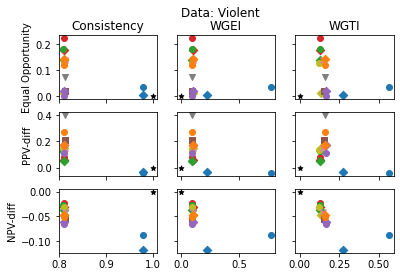

In [17]:
fig,axs = plt.subplots(nrows= 3, ncols= 3)
plt.rcParams.update({'figure.max_open_warning': 0})
axs[0,0].scatter(Violent_lr_baseline['CONSISTENCY'],Violent_lr_baseline['EOP'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_baseline['CONSISTENCY'],Violent_gbm_baseline['EOP'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_dir['CONSISTENCY'],Violent_lr_dir['EOP'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_dir['CONSISTENCY'],Violent_gbm_dir['EOP'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_rw['CONSISTENCY'],Violent_lr_rw['EOP'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_rw['CONSISTENCY'],Violent_gbm_rw['EOP'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_lfr['CONSISTENCY'],Violent_lr_lfr['EOP'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,0].scatter(Violent_gbm_lfr['CONSISTENCY'],Violent_gbm_lfr['EOP'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_pr_remover['CONSISTENCY'],Violent_pr_remover['EOP'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,0].scatter(Violent_AdDeb['CONSISTENCY'],Violent_AdDeb['EOP'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,0].scatter(Violent_Meta['CONSISTENCY'],Violent_Meta['EOP'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,0].scatter(Violent_lr_EO['CONSISTENCY'],Violent_lr_EO['EOP'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_EO['CONSISTENCY'],Violent_gbm_EO['EOP'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,0].scatter(Violent_lr_CalEO['CONSISTENCY'],Violent_lr_CalEO['EOP'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,0].scatter(Violent_gbm_CalEO['CONSISTENCY'],Violent_gbm_CalEO['EOP'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,0].scatter(1,0,color='black', marker= '*',  s=25)

axs[0,1].scatter(Violent_lr_baseline['WGEI'],Violent_lr_baseline['EOP'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_baseline['WGEI'],Violent_gbm_baseline['EOP'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_dir['WGEI'],Violent_lr_dir['EOP'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_dir['WGEI'],Violent_gbm_dir['EOP'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_rw['WGEI'],Violent_lr_rw['EOP'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_rw['WGEI'],Violent_gbm_rw['EOP'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_lfr['WGEI'],Violent_lr_lfr['EOP'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,1].scatter(Violent_gbm_lfr['WGEI'],Violent_gbm_lfr['EOP'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_pr_remover['WGEI'],Violent_pr_remover['EOP'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,1].scatter(Violent_AdDeb['WGEI'],Violent_AdDeb['EOP'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,1].scatter(Violent_Meta['WGEI'],Violent_Meta['EOP'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,1].scatter(Violent_lr_EO['WGEI'],Violent_lr_EO['EOP'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_EO['WGEI'],Violent_gbm_EO['EOP'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,1].scatter(Violent_lr_CalEO['WGEI'],Violent_lr_CalEO['EOP'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,1].scatter(Violent_gbm_CalEO['WGEI'],Violent_gbm_CalEO['EOP'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,1].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

axs[0,2].scatter(Violent_lr_baseline['WGTI'],Violent_lr_baseline['EOP'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_baseline['WGTI'],Violent_gbm_baseline['EOP'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_dir['WGTI'],Violent_lr_dir['EOP'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_dir['WGTI'],Violent_gbm_dir['EOP'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_rw['WGTI'],Violent_lr_rw['EOP'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_rw['WGTI'],Violent_gbm_rw['EOP'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_lfr['WGTI'],Violent_lr_lfr['EOP'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[0,2].scatter(Violent_gbm_lfr['WGTI'],Violent_gbm_lfr['EOP'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_pr_remover['WGTI'],Violent_pr_remover['EOP'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[0,2].scatter(Violent_AdDeb['WGTI'],Violent_AdDeb['EOP'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[0,2].scatter(Violent_Meta['WGTI'],Violent_Meta['EOP'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[0,2].scatter(Violent_lr_EO['WGTI'],Violent_lr_EO['EOP'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_EO['WGTI'],Violent_gbm_EO['EOP'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[0,2].scatter(Violent_lr_CalEO['WGTI'],Violent_lr_CalEO['EOP'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[0,2].scatter(Violent_gbm_CalEO['WGTI'],Violent_gbm_CalEO['EOP'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[0,2].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

#**********************************************************************************************************************************************
axs[1,0].scatter(Violent_lr_baseline['CONSISTENCY'],Violent_lr_baseline['PPV_diff'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_baseline['CONSISTENCY'],Violent_gbm_baseline['PPV_diff'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_dir['CONSISTENCY'],Violent_lr_dir['PPV_diff'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_dir['CONSISTENCY'],Violent_gbm_dir['PPV_diff'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_rw['CONSISTENCY'],Violent_lr_rw['PPV_diff'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_rw['CONSISTENCY'],Violent_gbm_rw['PPV_diff'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_lfr['CONSISTENCY'],Violent_lr_lfr['PPV_diff'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,0].scatter(Violent_gbm_lfr['CONSISTENCY'],Violent_gbm_lfr['PPV_diff'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_pr_remover['CONSISTENCY'],Violent_pr_remover['PPV_diff'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,0].scatter(Violent_AdDeb['CONSISTENCY'],Violent_AdDeb['PPV_diff'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,0].scatter(Violent_Meta['CONSISTENCY'],Violent_Meta['PPV_diff'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,0].scatter(Violent_lr_EO['CONSISTENCY'],Violent_lr_EO['PPV_diff'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_EO['CONSISTENCY'],Violent_gbm_EO['PPV_diff'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,0].scatter(Violent_lr_CalEO['CONSISTENCY'],Violent_lr_CalEO['PPV_diff'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,0].scatter(Violent_gbm_CalEO['CONSISTENCY'],Violent_gbm_CalEO['PPV_diff'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,0].scatter(1,0,color='black', marker= '*',  s=25)

axs[1,1].scatter(Violent_lr_baseline['WGEI'],Violent_lr_baseline['PPV_diff'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_baseline['WGEI'],Violent_gbm_baseline['PPV_diff'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_dir['WGEI'],Violent_lr_dir['PPV_diff'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_dir['WGEI'],Violent_gbm_dir['PPV_diff'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_rw['WGEI'],Violent_lr_rw['PPV_diff'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_rw['WGEI'],Violent_gbm_rw['PPV_diff'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_lfr['WGEI'],Violent_lr_lfr['PPV_diff'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,1].scatter(Violent_gbm_lfr['WGEI'],Violent_gbm_lfr['PPV_diff'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_pr_remover['WGEI'],Violent_pr_remover['PPV_diff'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,1].scatter(Violent_AdDeb['WGEI'],Violent_AdDeb['PPV_diff'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,1].scatter(Violent_Meta['WGEI'],Violent_Meta['PPV_diff'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,1].scatter(Violent_lr_EO['WGEI'],Violent_lr_EO['PPV_diff'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_EO['WGEI'],Violent_gbm_EO['PPV_diff'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,1].scatter(Violent_lr_CalEO['WGEI'],Violent_lr_CalEO['PPV_diff'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,1].scatter(Violent_gbm_CalEO['WGEI'],Violent_gbm_CalEO['PPV_diff'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,1].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

axs[1,2].scatter(Violent_lr_baseline['WGTI'],Violent_lr_baseline['PPV_diff'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_baseline['WGTI'],Violent_gbm_baseline['PPV_diff'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_dir['WGTI'],Violent_lr_dir['PPV_diff'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_dir['WGTI'],Violent_gbm_dir['PPV_diff'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_rw['WGTI'],Violent_lr_rw['PPV_diff'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_rw['WGTI'],Violent_gbm_rw['PPV_diff'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_lfr['WGTI'],Violent_lr_lfr['PPV_diff'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[1,2].scatter(Violent_gbm_lfr['WGTI'],Violent_gbm_lfr['PPV_diff'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_pr_remover['WGTI'],Violent_pr_remover['PPV_diff'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[1,2].scatter(Violent_AdDeb['WGTI'],Violent_AdDeb['PPV_diff'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[1,2].scatter(Violent_Meta['WGTI'],Violent_Meta['PPV_diff'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[1,2].scatter(Violent_lr_EO['WGTI'],Violent_lr_EO['PPV_diff'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_EO['WGTI'],Violent_gbm_EO['PPV_diff'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[1,2].scatter(Violent_lr_CalEO['WGTI'],Violent_lr_CalEO['PPV_diff'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[1,2].scatter(Violent_gbm_CalEO['WGTI'],Violent_gbm_CalEO['PPV_diff'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[1,2].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

#***********************************************************************************************************************************************
axs[2,0].scatter(Violent_lr_baseline['CONSISTENCY'],Violent_lr_baseline['NPV_diff'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_baseline['CONSISTENCY'],Violent_gbm_baseline['NPV_diff'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_dir['CONSISTENCY'],Violent_lr_dir['NPV_diff'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_dir['CONSISTENCY'],Violent_gbm_dir['NPV_diff'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_rw['CONSISTENCY'],Violent_lr_rw['NPV_diff'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_rw['CONSISTENCY'],Violent_gbm_rw['NPV_diff'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_lfr['CONSISTENCY'],Violent_lr_lfr['NPV_diff'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,0].scatter(Violent_gbm_lfr['CONSISTENCY'],Violent_gbm_lfr['NPV_diff'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_pr_remover['CONSISTENCY'],Violent_pr_remover['NPV_diff'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,0].scatter(Violent_AdDeb['CONSISTENCY'],Violent_AdDeb['NPV_diff'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,0].scatter(Violent_Meta['CONSISTENCY'],Violent_Meta['NPV_diff'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,0].scatter(Violent_lr_EO['CONSISTENCY'],Violent_lr_EO['NPV_diff'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_EO['CONSISTENCY'],Violent_gbm_EO['NPV_diff'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,0].scatter(Violent_lr_CalEO['CONSISTENCY'],Violent_lr_CalEO['NPV_diff'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,0].scatter(Violent_gbm_CalEO['CONSISTENCY'],Violent_gbm_CalEO['NPV_diff'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,0].scatter(1,0,color='black', marker= '*',  s=25)

axs[2,1].scatter(Violent_lr_baseline['WGEI'],Violent_lr_baseline['NPV_diff'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_baseline['WGEI'],Violent_gbm_baseline['NPV_diff'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_dir['WGEI'],Violent_lr_dir['NPV_diff'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_dir['WGEI'],Violent_gbm_dir['NPV_diff'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_rw['WGEI'],Violent_lr_rw['NPV_diff'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_rw['WGEI'],Violent_gbm_rw['NPV_diff'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_lfr['WGEI'],Violent_lr_lfr['NPV_diff'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,1].scatter(Violent_gbm_lfr['WGEI'],Violent_gbm_lfr['NPV_diff'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_pr_remover['WGEI'],Violent_pr_remover['NPV_diff'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,1].scatter(Violent_AdDeb['WGEI'],Violent_AdDeb['NPV_diff'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,1].scatter(Violent_Meta['WGEI'],Violent_Meta['NPV_diff'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,1].scatter(Violent_lr_EO['WGEI'],Violent_lr_EO['NPV_diff'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_EO['WGEI'],Violent_gbm_EO['NPV_diff'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,1].scatter(Violent_lr_CalEO['WGEI'],Violent_lr_CalEO['NPV_diff'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,1].scatter(Violent_gbm_CalEO['WGEI'],Violent_gbm_CalEO['NPV_diff'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,1].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

axs[2,2].scatter(Violent_lr_baseline['WGTI'],Violent_lr_baseline['NPV_diff'],color='tab:red', label='LR', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_baseline['WGTI'],Violent_gbm_baseline['NPV_diff'],color='tab:red', label='GBM', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_dir['WGTI'],Violent_lr_dir['NPV_diff'],color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_dir['WGTI'],Violent_gbm_dir['NPV_diff'],color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_rw['WGTI'],Violent_lr_rw['NPV_diff'],color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_rw['WGTI'],Violent_gbm_rw['NPV_diff'],color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_lfr['WGTI'],Violent_lr_lfr['NPV_diff'],color='tab:blue', label='LR_LFR', linestyle='-',marker= "D",)
axs[2,2].scatter(Violent_gbm_lfr['WGTI'],Violent_gbm_lfr['NPV_diff'],color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_pr_remover['WGTI'],Violent_pr_remover['NPV_diff'],color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v",)
axs[2,2].scatter(Violent_AdDeb['WGTI'],Violent_AdDeb['NPV_diff'],color='tab:brown', label='AdDeb', linestyle='-',marker= "s")
axs[2,2].scatter(Violent_Meta['WGTI'],Violent_Meta['NPV_diff'],color='tab:pink', label='Meta', linestyle='-',marker= "x")
axs[2,2].scatter(Violent_lr_EO['WGTI'],Violent_lr_EO['NPV_diff'],color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_EO['WGTI'],Violent_gbm_EO['NPV_diff'],color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o")
axs[2,2].scatter(Violent_lr_CalEO['WGTI'],Violent_lr_CalEO['NPV_diff'],color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D")
axs[2,2].scatter(Violent_gbm_CalEO['WGTI'],Violent_gbm_CalEO['NPV_diff'],color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o")
axs[2,2].scatter(idealfairness['x'],idealfairness['y'],color='black', marker= '*',  s=25)

for ax in axs.flat:
    ax.label_outer()
axs[0,0].set_ylabel('Equal Opportunity')
axs[0,0].set_title('Consistency')
axs[1,0].set_ylabel('PPV-diff')
axs[0,1].set_title('WGEI')
axs[2,0].set_ylabel('NPV-diff')
axs[0,2].set_title('WGTI')
fig.suptitle('Data: Violent')
#axs[0,0].legend(bbox_to_anchor=(4.8, 1.2),ncol=1)
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/Violent/GFvsIF2.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

#REPAIR LEVEL EFFECTS

GBM

In [18]:
#Violent 
#disparate impact values at varying repair levels for gbm
gbm0=pd.read_excel(dir_gbm_0, sheet_name="Violent").iloc[51:52]
gbm3=pd.read_excel(dir_gbm_3, sheet_name="Violent").iloc[51:52]
gbm5=pd.read_excel(dir_gbm_5, sheet_name="Violent").iloc[51:52] #old not working had recreate new tab (Violent_use)
gbm7=pd.read_excel(dir_gbm_7, sheet_name="Violent").iloc[51:52]
gbm1= pd.read_excel(dir_gbm, sheet_name='Violent').iloc[51:52]

#all together
gbms= pd.concat([gbm0,gbm3, gbm5, gbm7, gbm1])
gbms['Repair Level']=[0,0.3,0.5,0.7,1]





LR

In [19]:
#disparate impact values at varying repair levels for lr
lr0=pd.read_excel(dir_lr_0, sheet_name="Violent").iloc[51:52]
lr3=pd.read_excel(dir_lr_3, sheet_name="Violent").iloc[51:52]
lr5=pd.read_excel(dir_lr_5, sheet_name="Violent").iloc[51:52] #old not working had recreate new tab (Violent_use)
lr7=pd.read_excel(dir_lr_7, sheet_name="Violent").iloc[51:52]
lr1= pd.read_excel(dir_lr, sheet_name='Violent').iloc[51:52]

#all together
lrs= pd.concat([lr0, lr3, lr5, lr7, lr1])
lrs['Repair Level']=[0,0.3,0.5,0.7,1]


disparate impact and repair level

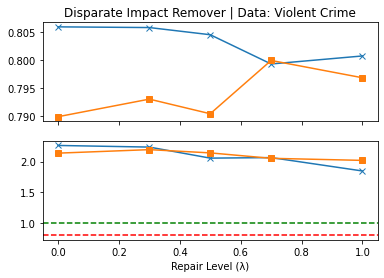

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex= True)

ax1.plot(gbms['Repair Level'],gbms['ACCURACY'],   marker='x',label='GBM')
ax1.plot(lrs['Repair Level'], lrs['ACCURACY'], marker='s',label='LogReg')

ax2.plot(gbms['Repair Level'], gbms['DI'],  marker='x',label='GBM')
ax2.plot(lrs['Repair Level'], lrs['DI'], marker='s',label='LogReg')
#ax2.plot(1,1, marker= '*', color='black')
ax2.axhline(y=1.0, linestyle='--', color= 'green',label='Ideal DI')
ax2.axhline(y=0.8, linestyle='--', color= 'red',label='minimum DI')
#ax2.plot(1,1, marker= '*', color='black')
# ax1.set_ylabel('Accuracy')
ax1.set_title("Disparate Impact Remover | Data: Violent Crime")
# ax2.set_ylabel('Disparate Impact (DI)')
ax2.set_xlabel('Repair Level (\u03BB)')
#plt.legend(bbox_to_anchor=(0.7, -0.4), ncol= 2)
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/Violent/DIRemover.png',dpi=300, format='png', bbox_inches='tight')
plt.show()



Accuracy and repair levels

In [21]:

#disparate impact values at varying repair levels for gbm
PR1=pd.read_excel(PRemover1, sheet_name="Violent").iloc[51:52]
PR25=pd.read_excel(PRemover25, sheet_name="Violent").iloc[51:52]
PR50=pd.read_excel(PRemover50, sheet_name="Violent").iloc[51:52] #old not working had recreate new tab (Violent_use)
PR75=pd.read_excel(PRemover75, sheet_name="Violent").iloc[51:52]
PR100= pd.read_excel(PRemover, sheet_name='Violent').iloc[51:52]

#all together
prs= pd.concat([PR1,PR25,PR50,PR75,PR100])
prs['Etas']=[1,25,50,75,100]


In [22]:
#disparate impact values at varying repair levels for gbm
meta_0=pd.read_excel(Meta0, sheet_name="Violent").iloc[53:54] # messing up!! had to lower the avg and std to rows 54 (53 over here due to indexstart=0) and 55(54 over here)
meta_2=pd.read_excel(Meta2, sheet_name="Violent").iloc[51:52]
meta_4=pd.read_excel(Meta4, sheet_name="Violent").iloc[51:52] #old not working had recreate new tab (Violent_use)
meta_6=pd.read_excel(Meta6, sheet_name="Violent").iloc[51:52]
meta_8= pd.read_excel(Meta8, sheet_name='Violent').iloc[51:52]
meta_1=pd.read_excel(Meta1, sheet_name='Violent').iloc[51:52]

#all together
metas= pd.concat([meta_0, meta_2, meta_4, meta_6, meta_8, meta_1])
metas['Tau']=[0,0.2,0.4,0.6,0.8,1.0]

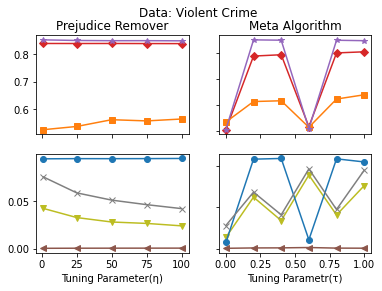

In [23]:
fig,axs = plt.subplots(nrows= 2, ncols= 2)
plt.rcParams.update({'figure.max_open_warning': 0})
axs[0,0].plot(prs['Etas'],prs['ACCURACY'],color='tab:red', label='Accuracy', linestyle='-',marker= "D")
axs[0,0].plot(prs['Etas'],prs['PPV'],color='tab:orange', label='Precision', linestyle='-',marker= "s")
axs[0,0].plot(prs['Etas'],prs['NPV'],color='tab:purple', label='NPV', linestyle='-',marker= "*")

axs[0,1].plot(metas['Tau'],metas['ACCURACY'],color='tab:red', label='Accuracy', linestyle='-',marker= "D")
axs[0,1].plot(metas['Tau'],metas['PPV'],color='tab:orange', label='Precision', linestyle='-',marker= "s")
axs[0,1].plot(metas['Tau'],metas['NPV'],color='tab:purple', label='NPV', linestyle='-',marker= "*")

axs[1,0].plot(prs['Etas'],prs['SP'],color='tab:olive', label='SP', linestyle='-',marker= "v")
axs[1,0].plot(prs['Etas'],prs['WGEI'],color='tab:blue', label='WGEI', linestyle='-',marker= "o")
axs[1,0].plot(prs['Etas'],prs['EO'],color='tab:gray', label='EO', linestyle='-',marker= "x")
axs[1,0].plot(prs['Etas'],prs['BGEI'],color='tab:brown', label='BGEI', linestyle='-',marker= "<")

axs[1,1].plot(metas['Tau'],metas['SP'],color='tab:olive', label='SP', linestyle='-',marker= "v")
axs[1,1].plot(metas['Tau'],metas['WGEI'],color='tab:blue', label='WGEI', linestyle='-',marker= "o")
axs[1,1].plot(metas['Tau'],metas['EO'],color='tab:gray', label='EO', linestyle='-',marker= "x")
axs[1,1].plot(metas['Tau'],metas['BGEI'],color='tab:brown', label='BGEI', linestyle='-',marker= "<")

axs[0,0].set_title('Prejudice Remover')
# axs[0,0].set_ylabel('Predictive Performance')
# axs[1,0].set_ylabel('Fairness Measure')
axs[0,1].set_title('Meta Algorithm')
axs[1,0].set_xlabel('Tuning Parameter(\u03B7)')
axs[1,1].set_xlabel('Tuning Parametr(\u03C4)')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# axs[0,0].legend(bbox_to_anchor=(2.8, 1),ncol=1)
# axs[1,1].legend(bbox_to_anchor=(1,1),ncol=1)
fig.suptitle('Data: Violent Crime')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/Violent/Hypers.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


# Computing Performance Metrics 

## dataframes

Baselines

In [24]:
#Baselines
#Logistic Regression Baseline
LR=pd.read_excel(baseline_lr, sheet_name="Violent")[51:52]
LR_std= pd.read_excel(baseline_lr, sheet_name="Violent")[52:53].add_suffix('_std')

#GBM Baseline
GBM=pd.read_excel(baseline_gbm, sheet_name="Violent")[51:52]
GBM_std= pd.read_excel(baseline_gbm, sheet_name="Violent")[52:53].add_suffix('_std')

Disparate impact remover

In [25]:
#DIR+ Logistic Regression
LR_dir=pd.read_excel(dir_lr, sheet_name="Violent")[51:52]
LR_dir_std= pd.read_excel(dir_lr, sheet_name="Violent")[52:53].add_suffix('_std')

#DIR+ GBM
GBM_dir=pd.read_excel(dir_gbm, sheet_name="Violent")[51:52]
GBM_dir_std= pd.read_excel(dir_gbm, sheet_name="Violent")[52:53].add_suffix('_std')



Reweighing

In [26]:
#RW+ Logistic Regression
LR_rw=pd.read_excel(rw_lr, sheet_name="Violent")[51:52]
LR_rw_std= pd.read_excel(rw_lr, sheet_name="Violent")[52:53].add_suffix('_std')

#RW+ GBM
GBM_rw=pd.read_excel(rw_gbm, sheet_name="Violent")[51:52]
GBM_rw_std= pd.read_excel(rw_gbm, sheet_name="Violent")[52:53].add_suffix('_std')

LFR

In [27]:
#LFR+ Logistic Regression
LR_lfr=pd.read_excel(lfr_lr, sheet_name="Violent")[51:52]
LR_lfr_std= pd.read_excel(lfr_lr, sheet_name="Violent")[52:53].add_suffix('_std')

#LFR+ GBM
GBM_lfr=pd.read_excel(lfr_gbm, sheet_name="Violent")[51:52]
GBM_lfr_std= pd.read_excel(lfr_gbm, sheet_name="Violent")[52:53].add_suffix('_std')

Prejudice Remover

In [28]:
#Prejudice Remover
PR=pd.read_excel(PRemover, sheet_name="Violent")[51:52]
PR_std= pd.read_excel(PRemover, sheet_name="Violent")[52:53].add_suffix('_std')


AdeDeb

In [29]:
# AdDeb
adDeb=pd.read_excel(AdDeb, sheet_name="Violent")[51:52]
adDeb_std= pd.read_excel(AdDeb, sheet_name="Violent")[52:53].add_suffix('_std')

Meta Classifier

In [30]:
meta=pd.read_excel(Meta1, sheet_name="Violent")[51:52]
meta_std= pd.read_excel(Meta1, sheet_name="Violent")[52:53].add_suffix('_std')

Equal Odds

In [31]:
#EO+ Logistic Regression
LR_EO=pd.read_excel(EO_lr, sheet_name="Violent")[51:52]
LR_EO_std= pd.read_excel(EO_lr, sheet_name="Violent")[52:53].add_suffix('_std')

#EO+ GBM
GBM_EO=pd.read_excel(EO_gbm, sheet_name="Violent")[51:52]
GBM_EO_std= pd.read_excel(EO_gbm, sheet_name="Violent")[52:53].add_suffix('_std')

Calibrated Equal Odds

In [32]:
#CalEO+ Logistic Regression
LR_CalEO=pd.read_excel(CalEO_lr, sheet_name="Violent")[51:52]
LR_CalEO_std= pd.read_excel(CalEO_lr, sheet_name="Violent")[52:53].add_suffix('_std')

#CalEO+ GBM
GBM_CalEO=pd.read_excel(CalEO_gbm, sheet_name="Violent")[51:52]
GBM_CalEO_std= pd.read_excel(CalEO_gbm, sheet_name="Violent")[52:53].add_suffix('_std')

 ## Accuracies, Precision, NPV

Comparing the performance metrics of the various baseline and bias mitigation algorithms

In [33]:
Accuracy= list([LR['ACCURACY'].to_numpy()[0], GBM['ACCURACY'].to_numpy()[0], LR_dir['ACCURACY'].to_numpy()[0],
                GBM_dir['ACCURACY'].to_numpy()[0],LR_rw['ACCURACY'].to_numpy()[0], GBM_rw['ACCURACY'].to_numpy()[0],
                LR_lfr['ACCURACY'].to_numpy()[0], GBM_lfr['ACCURACY'].to_numpy()[0], PR['ACCURACY'].to_numpy()[0],
                adDeb['ACCURACY'].to_numpy()[0],meta['ACCURACY'].to_numpy()[0],
                LR_EO['ACCURACY'].to_numpy()[0],GBM_EO['ACCURACY'].to_numpy()[0],LR_CalEO['ACCURACY'].to_numpy()[0],
                GBM_CalEO['ACCURACY'].to_numpy()[0]])

Accuracy_std= list([LR_std['ACCURACY_std'].to_numpy()[0], GBM_std['ACCURACY_std'].to_numpy()[0], LR_dir_std['ACCURACY_std'].to_numpy()[0],
                GBM_dir_std['ACCURACY_std'].to_numpy()[0],LR_rw_std['ACCURACY_std'].to_numpy()[0], GBM_rw_std['ACCURACY_std'].to_numpy()[0],
                LR_lfr_std['ACCURACY_std'].to_numpy()[0], GBM_lfr_std['ACCURACY_std'].to_numpy()[0], PR_std['ACCURACY_std'].to_numpy()[0],
                adDeb_std['ACCURACY_std'].to_numpy()[0],meta_std['ACCURACY_std'].to_numpy()[0],
                LR_EO_std['ACCURACY_std'].to_numpy()[0],GBM_EO_std['ACCURACY_std'].to_numpy()[0],LR_CalEO_std['ACCURACY_std'].to_numpy()[0],
                GBM_CalEO_std['ACCURACY_std'].to_numpy()[0]])


In [34]:
PPV= list([LR['PPV'].to_numpy()[0], GBM['PPV'].to_numpy()[0], LR_dir['PPV'].to_numpy()[0],
                GBM_dir['PPV'].to_numpy()[0],LR_rw['PPV'].to_numpy()[0], GBM_rw['PPV'].to_numpy()[0],
                LR_lfr['PPV'].to_numpy()[0], GBM_lfr['PPV'].to_numpy()[0], PR['PPV'].to_numpy()[0],
                adDeb['PPV'].to_numpy()[0],meta['PPV'].to_numpy()[0],
                LR_EO['PPV'].to_numpy()[0],GBM_EO['PPV'].to_numpy()[0],LR_CalEO['PPV'].to_numpy()[0],
                GBM_CalEO['PPV'].to_numpy()[0]])

PPV_std= list([LR_std['PPV_std'].to_numpy()[0], GBM_std['PPV_std'].to_numpy()[0], LR_dir_std['PPV_std'].to_numpy()[0],
                GBM_dir_std['PPV_std'].to_numpy()[0],LR_rw_std['PPV_std'].to_numpy()[0], GBM_rw_std['PPV_std'].to_numpy()[0],
                LR_lfr_std['PPV_std'].to_numpy()[0], GBM_lfr_std['PPV_std'].to_numpy()[0], PR_std['PPV_std'].to_numpy()[0],
                adDeb_std['PPV_std'].to_numpy()[0],meta_std['PPV_std'].to_numpy()[0],
                LR_EO_std['PPV_std'].to_numpy()[0],GBM_EO_std['PPV_std'].to_numpy()[0],LR_CalEO_std['PPV_std'].to_numpy()[0],
                GBM_CalEO_std['PPV_std'].to_numpy()[0]])


In [35]:
NPV= list([LR['NPV'].to_numpy()[0], GBM['NPV'].to_numpy()[0], LR_dir['NPV'].to_numpy()[0],
                GBM_dir['NPV'].to_numpy()[0],LR_rw['NPV'].to_numpy()[0], GBM_rw['NPV'].to_numpy()[0],
                LR_lfr['NPV'].to_numpy()[0], GBM_lfr['NPV'].to_numpy()[0], PR['NPV'].to_numpy()[0],
                adDeb['NPV'].to_numpy()[0],meta['NPV'].to_numpy()[0],
                LR_EO['NPV'].to_numpy()[0],GBM_EO['NPV'].to_numpy()[0],LR_CalEO['NPV'].to_numpy()[0],
                GBM_CalEO['NPV'].to_numpy()[0]])

NPV_std= list([LR_std['NPV_std'].to_numpy()[0], GBM_std['NPV_std'].to_numpy()[0], LR_dir_std['NPV_std'].to_numpy()[0],
                GBM_dir_std['NPV_std'].to_numpy()[0],LR_rw_std['NPV_std'].to_numpy()[0], GBM_rw_std['NPV_std'].to_numpy()[0],
                LR_lfr_std['NPV_std'].to_numpy()[0], GBM_lfr_std['NPV_std'].to_numpy()[0], PR_std['NPV_std'].to_numpy()[0],
                adDeb_std['NPV_std'].to_numpy()[0],meta_std['NPV_std'].to_numpy()[0],
                LR_EO_std['NPV_std'].to_numpy()[0],GBM_EO_std['NPV_std'].to_numpy()[0],LR_CalEO_std['NPV_std'].to_numpy()[0],
                GBM_CalEO_std['NPV_std'].to_numpy()[0]])


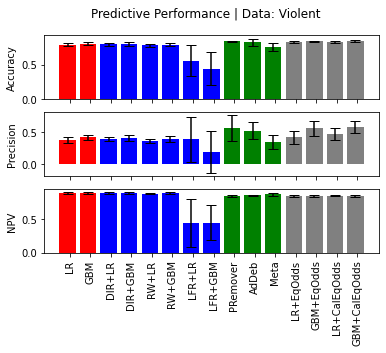

In [36]:
fig,axs = plt.subplots(3, sharex=True)

ind = np.arange(15)

width=0.2
# Plotting
axs[0].bar( ind, Accuracy,align='center', yerr= Accuracy_std,  ecolor='black', capsize=5, color=['r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])
axs[1].bar( ind, PPV,align='center', yerr= PPV_std,  ecolor='black', capsize=5, color=['r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])
axs[2].bar( ind, NPV,align='center', yerr= NPV_std,  ecolor='black', capsize=5, color=['r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])

axs[0].set_ylabel('Accuracy')
axs[1].set_ylabel('Precision')
axs[2].set_ylabel('NPV')

xlabels= ['LR','GBM','DIR+LR','DIR+GBM','RW+LR','RW+GBM','LFR+LR','LFR+GBM','PRemover','AdDeb','Meta','LR+EqOdds','GBM+EqOdds','LR+CalEqOdds','GBM+CalEqOdds']
plt.xticks(ind + width / 2, xlabels, rotation= 'vertical' )
fig.suptitle('Predictive Performance | Data: Violent')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/Violent/Performance.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


## DI Impact, Consistency, and SP 

Comparing DI impact, Consistency, and Statistical Parity in Data, Baseline classifiers and Bias Mitigation Algorithms

In [37]:
DI= list([LR['DATA_DI'].to_numpy()[0],LR['DI'].to_numpy()[0], GBM['DI'].to_numpy()[0], LR_dir['DI'].to_numpy()[0],
                GBM_dir['DI'].to_numpy()[0],LR_rw['DI'].to_numpy()[0], GBM_rw['DI'].to_numpy()[0],
                LR_lfr['DI'].to_numpy()[0], GBM_lfr['DI'].to_numpy()[0], PR['DI'].to_numpy()[0],
                adDeb['DI'].to_numpy()[0],meta['DI'].to_numpy()[0],
                LR_EO['DI'].to_numpy()[0],GBM_EO['DI'].to_numpy()[0],LR_CalEO['DI'].to_numpy()[0],
                GBM_CalEO['DI'].to_numpy()[0]])

DI_std= list([LR_std['DATA_DI_std'].to_numpy()[0], LR_std['DI_std'].to_numpy()[0],GBM_std['DI_std'].to_numpy()[0], LR_dir_std['DI_std'].to_numpy()[0],
                GBM_dir_std['DI_std'].to_numpy()[0],LR_rw_std['DI_std'].to_numpy()[0], GBM_rw_std['DI_std'].to_numpy()[0],
                LR_lfr_std['DI_std'].to_numpy()[0], GBM_lfr_std['DI_std'].to_numpy()[0], PR_std['DI_std'].to_numpy()[0],
                adDeb_std['DI_std'].to_numpy()[0],meta_std['DI_std'].to_numpy()[0],
                LR_EO_std['DI_std'].to_numpy()[0],GBM_EO_std['DI_std'].to_numpy()[0],LR_CalEO_std['PPV_std'].to_numpy()[0],
                GBM_CalEO_std['DI_std'].to_numpy()[0]])


In [38]:
SP= list([LR['DATA_SP'].to_numpy()[0],LR['SP'].to_numpy()[0], GBM['SP'].to_numpy()[0], LR_dir['SP'].to_numpy()[0],
                GBM_dir['SP'].to_numpy()[0],LR_rw['SP'].to_numpy()[0], GBM_rw['SP'].to_numpy()[0],
                LR_lfr['SP'].to_numpy()[0], GBM_lfr['SP'].to_numpy()[0], PR['SP'].to_numpy()[0],
                adDeb['SP'].to_numpy()[0],meta['SP'].to_numpy()[0],
                LR_EO['SP'].to_numpy()[0],GBM_EO['SP'].to_numpy()[0],LR_CalEO['SP'].to_numpy()[0],
                GBM_CalEO['SP'].to_numpy()[0]])

SP_std= list([LR_std['DATA_SP_std'].to_numpy()[0], LR_std['SP_std'].to_numpy()[0],GBM_std['SP_std'].to_numpy()[0], LR_dir_std['SP_std'].to_numpy()[0],
                GBM_dir_std['SP_std'].to_numpy()[0],LR_rw_std['SP_std'].to_numpy()[0], GBM_rw_std['SP_std'].to_numpy()[0],
                LR_lfr_std['SP_std'].to_numpy()[0], GBM_lfr_std['SP_std'].to_numpy()[0], PR_std['SP_std'].to_numpy()[0],
                adDeb_std['SP_std'].to_numpy()[0],meta_std['SP_std'].to_numpy()[0],
                LR_EO_std['SP_std'].to_numpy()[0],GBM_EO_std['SP_std'].to_numpy()[0],LR_CalEO_std['PPV_std'].to_numpy()[0],
                GBM_CalEO_std['SP_std'].to_numpy()[0]])

In [39]:
CONSISTENCY= list([LR['DATA_CONS'].to_numpy()[0],LR['CONSISTENCY'].to_numpy()[0], GBM['CONSISTENCY'].to_numpy()[0], LR_dir['CONSISTENCY'].to_numpy()[0],
                GBM_dir['CONSISTENCY'].to_numpy()[0],LR_rw['CONSISTENCY'].to_numpy()[0], GBM_rw['CONSISTENCY'].to_numpy()[0],
                LR_lfr['CONSISTENCY'].to_numpy()[0], GBM_lfr['CONSISTENCY'].to_numpy()[0], PR['CONSISTENCY'].to_numpy()[0],
                adDeb['CONSISTENCY'].to_numpy()[0],meta['CONSISTENCY'].to_numpy()[0],
                LR_EO['CONSISTENCY'].to_numpy()[0],GBM_EO['CONSISTENCY'].to_numpy()[0],LR_CalEO['CONSISTENCY'].to_numpy()[0],
                GBM_CalEO['CONSISTENCY'].to_numpy()[0]])

CONSISTENCY_std= list([LR_std['DATA_CONS_std'].to_numpy()[0], LR_std['CONSISTENCY_std'].to_numpy()[0],GBM_std['CONSISTENCY_std'].to_numpy()[0], LR_dir_std['CONSISTENCY_std'].to_numpy()[0],
                GBM_dir_std['CONSISTENCY_std'].to_numpy()[0],LR_rw_std['CONSISTENCY_std'].to_numpy()[0], GBM_rw_std['CONSISTENCY_std'].to_numpy()[0],
                LR_lfr_std['CONSISTENCY_std'].to_numpy()[0], GBM_lfr_std['CONSISTENCY_std'].to_numpy()[0], PR_std['CONSISTENCY_std'].to_numpy()[0],
                adDeb_std['CONSISTENCY_std'].to_numpy()[0],meta_std['CONSISTENCY_std'].to_numpy()[0],
                LR_EO_std['CONSISTENCY_std'].to_numpy()[0],GBM_EO_std['CONSISTENCY_std'].to_numpy()[0],LR_CalEO_std['PPV_std'].to_numpy()[0],
                GBM_CalEO_std['CONSISTENCY_std'].to_numpy()[0]])

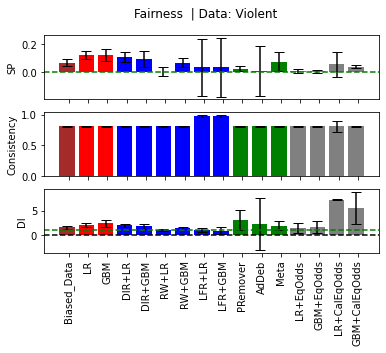

In [40]:
fig,axs = plt.subplots(3, sharex=True)

ind = np.arange(16)

width=0.2
axs[0].bar( ind, SP,align='center', yerr= SP_std,  ecolor='black', capsize=5, color=['brown','r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])
axs[0].axhline(y=0, color= 'green',linestyle= '--')
axs[0].set_ylabel('SP')

axs[1].bar( ind, CONSISTENCY,align='center', yerr= CONSISTENCY_std,  ecolor='black', capsize=5, color=['brown','r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])
axs[1].set_ylabel('Consistency')

axs[2].bar( ind, DI,align='center', yerr= DI_std,  ecolor='black', capsize=5, color=['brown','r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])
axs[2].axhline(y=1, color= 'green',linestyle= '--')
axs[2].axhline(y=0, color= 'black',linestyle= '--')
axs[2].set_ylabel('DI')

xlabels= ['Biased_Data','LR','GBM','DIR+LR','DIR+GBM','RW+LR','RW+GBM','LFR+LR','LFR+GBM','PRemover','AdDeb','Meta','LR+EqOdds','GBM+EqOdds','LR+CalEqOdds','GBM+CalEqOdds']
plt.xticks(ind + width / 2, xlabels, rotation= 'vertical' )
fig.suptitle('Fairness  | Data: Violent')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/Violent/Fairness.png',dpi=300, format='png', bbox_inches='tight')
plt.show()